This project is meant to predict and detect anomalies on triphasic motors using the following dataset, the code was created using previous programming knowledge, TimeGPT documentation and a bit of chatGPt(I tried to use as little as possible while producing the code but I stumble across some bugs which it helped me to solve):                                                                                                                                                                                              
https://drive.google.com/drive/folders/1d70I-XacHhA7i7MsVQa-iFJvp2nTiayA

In [20]:
#!pip install nixtla

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nixtla import NixtlaClient
import os


In [22]:
#api config
nixtla_client = NixtlaClient(
    api_key = 'nixtla-tok-CTYlY4bXXnUAKK84Rw7FhEIhwwYt97jkNGnwkT10totonfAxUky0GkjXVnxIOva5aSszvlxb0fayv9Gi'
)

In [23]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [24]:
#loading the dataset
local_path = os.getcwd()

folder =  "sp_index"

dataset_path = os.path.join(local_path,folder, "sp500_index.csv")

dataset = pd.read_csv(dataset_path)

In [25]:
dataset

,Date,S&P500
0,2014-07-31,1930.67
1,2014-08-01,1925.15
2,2014-08-04,1938.99
3,2014-08-05,1920.21
4,2014-08-06,1920.24
...,...,...
2530,2024-08-20,5597.12
2531,2024-08-21,5620.85
2532,2024-08-22,5570.64
2533,2024-08-23,5634.61


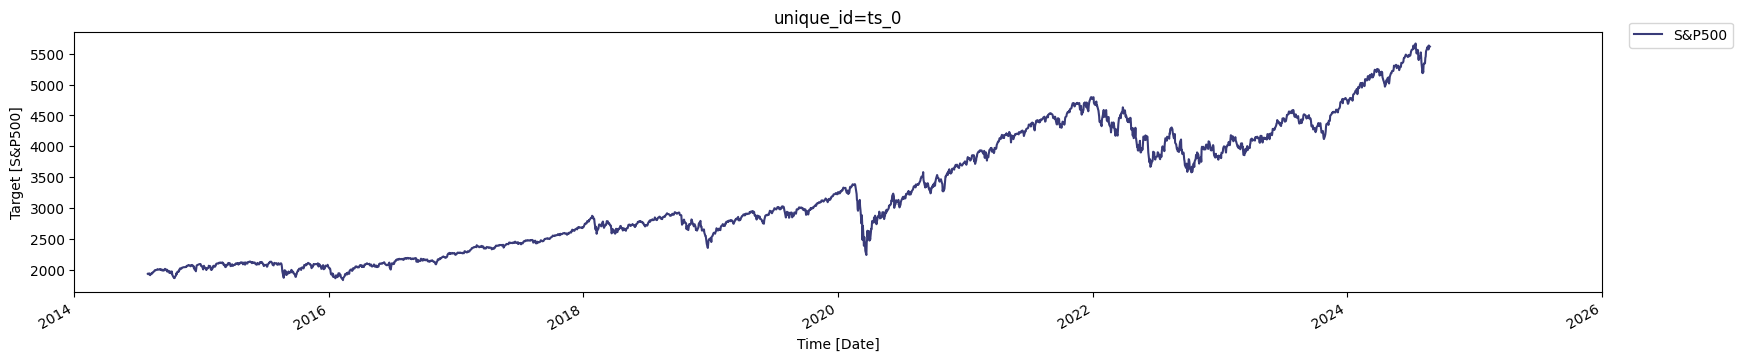

In [26]:
nixtla_client.plot(dataset, time_col='Date', target_col='S&P500')


In [30]:
dataset

,Date,S&P500
0,2014-07-31,1930.67
1,2014-08-01,1925.15
2,2014-08-04,1938.99
3,2014-08-05,1920.21
4,2014-08-06,1920.24
...,...,...
2510,2024-07-23,5555.74
2511,2024-07-24,5427.13
2512,2024-07-25,5399.22
2513,2024-07-26,5459.10


In [38]:
H = 5

In [39]:
test_dataset = dataset.iloc[len(dataset)-H:]
dataset =  dataset.iloc[:len(dataset)-H]

In [40]:
#predict the mean voltage
forecast_df = nixtla_client.forecast(dataset,h=H,freq='D', time_col='Date', target_col="S&P500") 

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


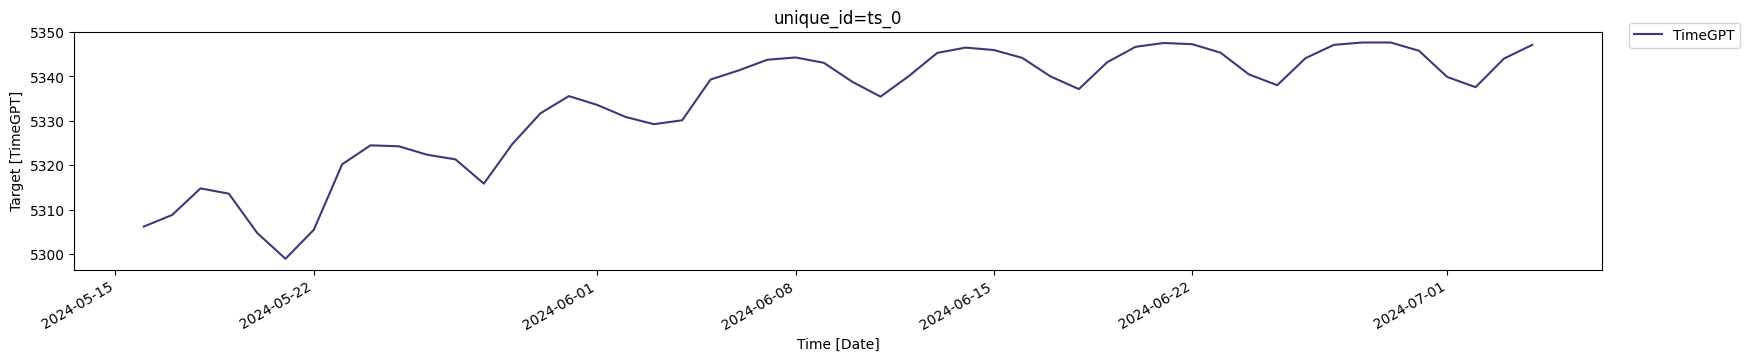

In [41]:
# Plot predictions
nixtla_client.plot(
    df=forecast_df, 
    time_col='Date', 
    target_col="TimeGPT"
)

In [49]:
max_predvalue = forecast_df['TimeGPT'].max()
var_pred = forecast_df['TimeGPT'].std()

max_predvalue, var_pred

(5347.6484375, 13.657167225740864)

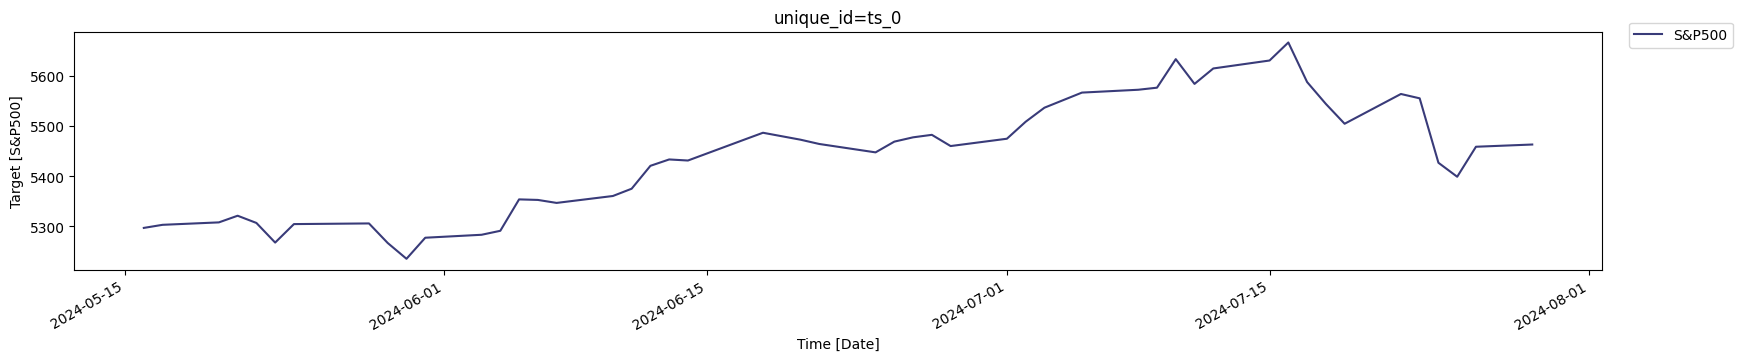

In [50]:
#plot real values
nixtla_client.plot(
    df=test_dataset, 
    time_col='Date', 
    target_col="S&P500"
)

In [51]:
max_realvalue = test_dataset['S&P500'].max()
var_real = test_dataset['S&P500'].std()


max_realvalue, var_real

(5667.2, 115.81853964046076)

C:\Users\jpedr\AppData\Local\Temp\ipykernel_21964\3154006533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['Date'] = pd.to_datetime(test_dataset['Date'])


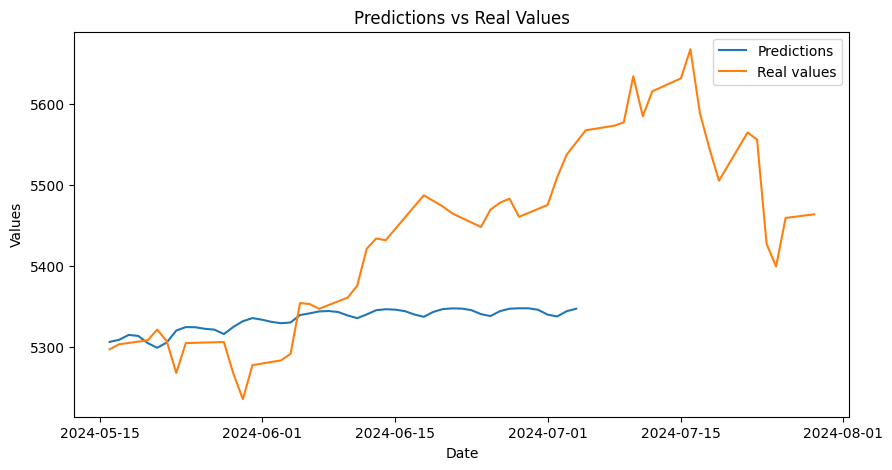

In [53]:
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
test_dataset['Date'] = pd.to_datetime(test_dataset['Date'])

# Plot the predictions and real values
plt.figure(figsize=(10, 5))
plt.plot(forecast_df['Date'], forecast_df['TimeGPT'], label='Predictions')
plt.plot(test_dataset['Date'], test_dataset['S&P500'], label='Real values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Predictions vs Real Values')
plt.legend()
plt.show()

In [54]:
#error
error = np.mean(np.abs(test_dataset['S&P500'].values - forecast_df['TimeGPT'].values))
error

118.21560195312497